In this notebook, we apply our final CNN model to the test set. 

In [1]:
## For data handling
import pandas as pd
import numpy as np
import os, shutil

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

from sklearn.metrics import accuracy_score, confusion_matrix

## This sets the plot style
## to have a grid on a white background
#set_style("darkgrid")

set_style("whitegrid")

In [2]:
## Importing the things we need from keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator
#from keras.utils import 
# tf.keras.utils.image_dataset_from_directory

# New: this will save the training history to a csv file:
from keras.callbacks import CSVLogger

2022-06-04 13:56:55.565134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-04 13:56:55.565147: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Set the shape of the images to be loaded into the model:

pixel_height = 219     # This is the FIRST coordinate in the files
pixel_width = 269      # This is the SECOND coordinate in the files
channels = 3           # 3 because we're using RGB


# Type in the paths to the train, validation, and test directories here:

# train_dir = 'spectrograms_cnn_base/large_train' # we no longer use a validation set
test_dir = '../Data/spectrograms_cnn_base/test'
#validation_dir = 'spectrograms_cnn_base/validation'

In [4]:
# Import the final model:

model = models.load_model('Final_model_trained/pathname_model_final')

2022-06-04 13:57:05.555841: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 13:57:05.556067: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-04 13:57:05.556101: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-04 13:57:05.556131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-04 13:57:05.556160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [5]:
# Create a generator that will import and preprocess the spectrograms in the test folder: 

test_datagen = ImageDataGenerator(rescale = 1./255)  # rescale so values are between 0 and 1


batch_size = 1200 #Same as the number of images in the test set. 




test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size = (pixel_height, pixel_width),
                    batch_size = batch_size,
                    class_mode = 'categorical')



Found 1200 images belonging to 6 classes.


In [6]:
# Get the output of test_generator:

output = test_generator.next()

In [7]:
# Divide output into X_test, y_test:

X_test = output[0]
y_test = output[1]

In [8]:
# Get the predicted values on X_test, turn them to integers from 0 to 5:

pred = np.argmax(model.predict(X_test), axis=1)

38/38 [==============================] - 2s 52ms/step


In [9]:
# Turn the one-hot encodings in y_test into integers from 0 to 5:

y_test_cats = np.argmax(y_test, axis=1)

In [10]:
# Get the mapping between integers to emotion labels:

test_generator.class_indices


{'ANG': 0, 'DIS': 1, 'FEA': 2, 'HAP': 3, 'NEU': 4, 'SAD': 5}

In [11]:
# Get dict with int to emotion label:

dict = {0:'ANG', 1:'DIS', 2:'FEA', 3:'HAP', 4:'NEU', 5:'SAD'}

In [12]:
# Get copies of pred, y_test_cats with the emotional labels:

pred_list = list(pred)

y_test_cats_list = list(y_test_cats)


pred_list_emos = [dict[num] for num in pred_list]


y_test_cats_emos = [dict[num] for num in y_test_cats_list]



In [13]:
# Get the confusion matrix, with labels in the same order as the confusion matrix for SVM:
labels = ['NEU', 'ANG', 'HAP', 'SAD', 'FEA', 'DIS']

conf_mat = confusion_matrix(y_test_cats_emos, pred_list_emos, labels=labels )

print(conf_mat)

[[ 87   1  40  74   4   9]
 [ 15 133  45   1   0   3]
 [ 29  41 101  13   8   5]
 [ 18   3  19 135   8  14]
 [ 19  11  77  62  19   9]
 [ 23  28  38  67   2  39]]


In [32]:
confusion_mat2 = confusion_matrix(y_test_cats_emos, pred_list_emos)


In [33]:
confusion_mat2

array([[133,   3,   0,  45,  15,   1],
       [ 28,  39,   2,  38,  23,  67],
       [ 11,   9,  19,  77,  19,  62],
       [ 41,   5,   8, 101,  29,  13],
       [  1,   9,   4,  40,  87,  74],
       [  3,  14,   8,  19,  18, 135]])

In [14]:
# Get the overall accuracy:
acc = accuracy_score(y_test_cats_emos, pred_list_emos)
print(acc)

0.42833333333333334


In [28]:
np.round(conf_mat,0)

array([[ 87,   1,  40,  74,   4,   9],
       [ 15, 133,  45,   1,   0,   3],
       [ 29,  41, 101,  13,   8,   5],
       [ 18,   3,  19, 135,   8,  14],
       [ 19,  11,  77,  62,  19,   9],
       [ 23,  28,  38,  67,   2,  39]])

<AxesSubplot:>

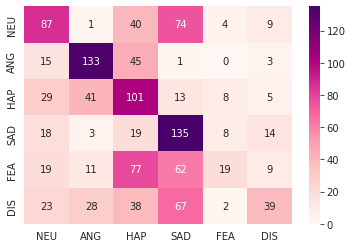

In [36]:
# Redraw the confusion matrix to have emotion labels on the axes:

class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]

import seaborn as sns
sns.heatmap(conf_mat,
            annot=True,
            xticklabels=class_names,
            yticklabels=class_names,
            cmap=plt.cm.RdPu,
            fmt='g')

